In [1]:
import os
import re
import csv
import urllib
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from urllib.request import urlopen
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [2]:
if os.path.exists("stats.csv"):
    os.remove("stats.csv")
if os.path.exists("abilities.csv"):
    os.remove("abilities.csv")
api.dataset_download_file('dannielr/marvel-superheroes', 'charcters_stats.csv')
api.dataset_download_file('dannielr/marvel-superheroes', 'superheroes_power_matrix.csv')
os.rename("charcters_stats.csv", "stats.csv")
os.rename("superheroes_power_matrix.csv", "abilities.csv")

In [3]:
stats = pd.read_csv("stats.csv")
stats

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436
...,...,...,...,...,...,...,...,...,...
606,Yellowjacket,good,88,10,12,28,12,14,164
607,Yellowjacket II,good,50,10,35,28,31,28,182
608,Ymir,good,50,100,27,100,83,28,388
609,Zatanna,good,75,10,23,28,100,56,292


In [4]:
abilities = pd.read_csv("abilities.csv")
abilities

,Name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Yellowjacket II,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
663,Ymir,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
664,Yoda,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
665,Zatanna,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df = stats.merge(abilities, on=['Name'])
df

,Name,Alignment,Intelligence_x,Strength,Speed,Durability_x,Power,Combat,Total,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,good,50,31,43,32,25,52,233,True,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,good,38,100,17,80,17,64,316,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,good,88,14,35,42,35,85,299,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,good,50,90,53,64,84,65,406,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,bad,63,80,53,90,55,95,436,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,Yellowjacket,good,88,10,12,28,12,14,164,False,...,False,False,False,False,False,False,False,False,False,False
515,Yellowjacket II,good,50,10,35,28,31,28,182,False,...,False,False,False,False,False,False,False,False,False,False
516,Ymir,good,50,100,27,100,83,28,388,False,...,False,False,False,False,False,False,False,False,False,False
517,Zatanna,good,75,10,23,28,100,56,292,False,...,False,False,False,False,False,False,False,False,False,False


,Name,Alignment,Intelligence_x,Strength,Speed,Durability_x,Power,Combat,Total,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
112,Captain America,good,63,19,35,56,46,100,319,True,...,False,False,False,False,False,False,False,False,False,False


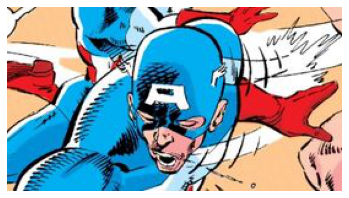

In [6]:
rand1 = df.sample()
display(rand1)
for i in rand1.Name :
    temp = i.replace(" ", "_")
    marvellink = 'https://marvel.fandom.com/wiki/'+temp
    html = urlopen(marvellink)
    bs = BeautifulSoup(html, 'html.parser')
    il = bs.find('img', {'src':re.compile('.jpg')})['src']
    urllib.request.urlretrieve(il,"img.jpg")
    plt.imshow(mpimg.imread('img.jpg'))
    plt.axis('off')
    plt.show()
    os.remove("img.jpg")

,Name,Alignment,Intelligence_x,Strength,Speed,Durability_x,Power,Combat,Total,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
55,Battlestar,good,50,53,35,74,48,74,334,True,...,False,False,False,False,False,False,False,False,False,False


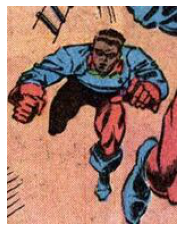

In [7]:
rand2 = df.sample()
display(rand2)
for i in rand2.Name :
    temp = i.replace(" ", "_")
    marvellink = 'https://marvel.fandom.com/wiki/'+temp
    html = urlopen(marvellink)
    bs = BeautifulSoup(html, 'html.parser')
    il = bs.find('img', {'src':re.compile('.jpg')})['src']
    urllib.request.urlretrieve(il,"img.jpg")
    plt.imshow(mpimg.imread('img.jpg'))
    plt.axis('off')
    plt.show()
    os.remove("img.jpg")